In [1]:

import logging
logging.basicConfig(level = logging.DEBUG)

from browser_use.llm import ChatOpenAI, ChatOllama
from browser_use import Agent, BrowserSession
from dotenv import load_dotenv
from ollama import Client
import sys
import os 
load_dotenv()
import asyncio

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
OLLAMA_HOST = "http://localhost:11434"
# MODEL= "deepseek-r1:latest"  # Change this to your desired model
MODEL= "llama3.1:8b"  # Change this to your desired model
# MODEL= "gemma3n:e4b"  # Change this to your desired model
# MODEL= "gemma3:12b"  # Change this to your desired model
LOG_OUTPUT_DIR = f"logs/conversation/{MODEL}"

In [2]:

#Checking 
client = Client(host = OLLAMA_HOST)

try:
    for model in client.list() :
        print(model)

    print("Connected successfully!")
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)



DEBUG:httpcore.connection:connect_tcp.started host='localhost' port=11434 local_address=None timeout=None socket_options=None
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x120be4c20>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Content-Type', b'application/json; charset=utf-8'), (b'Date', b'Sun, 13 Jul 2025 14:34:19 GMT'), (b'Transfer-Encoding', b'chunked')])
INFO:httpx:HTTP Request: GET http://localhost:11434/api/tags "HTTP/1.1 200 OK"
DEBUG:httpcore.http11:receive_response_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receiv

('models', [Model(model='gemma3:12b', modified_at=datetime.datetime(2025, 7, 12, 11, 17, 25, 289671, tzinfo=TzInfo(-04:00)), digest='f4031aab637d1ffa37b42570452ae0e4fad0314754d17ded67322e4b95836f8a', size=8149190253, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='12.2B', quantization_level='Q4_K_M')), Model(model='gemma3n:e4b', modified_at=datetime.datetime(2025, 7, 12, 11, 12, 9, 610739, tzinfo=TzInfo(-04:00)), digest='15cb39fd9394fd2549f6df9081cfc84dd134ecf2c9c5be911e5629920489ac32', size=7547589116, details=ModelDetails(parent_model='', format='gguf', family='gemma3n', families=['gemma3n'], parameter_size='6.9B', quantization_level='Q4_K_M')), Model(model='deepseek-r1:latest', modified_at=datetime.datetime(2025, 7, 12, 10, 46, 23, 986426, tzinfo=TzInfo(-04:00)), digest='6995872bfe4c521a67b32da386cd21d5c6e819b6e0d62f79f64ec83be99f5763', size=5225376047, details=ModelDetails(parent_model='', format='gguf', family='qwen3', fam

# Agents

In [3]:
browser_session = BrowserSession(
    window_size={'width': 800, 'height': 600},
)

initial_actions = [
    {'go_to_url': {'url': 'https://www.google.com', 'new_tab': True}},
]


# agent = Agent(
#     task="Check the weather in Miami Florida",
#     llm = ChatOpenAI(model="gpt-4.1", api_key=OPENAI_API_KEY),
#     initial_actions=initial_actions,
# )

# message_context = "Don't go to images, only search for weather information using default settings "
# task_prompt = "Search google for weather information in Miami Florida"
task_prompt = "Search google for weather information in California"

llm = ChatOllama(
    host=OLLAMA_HOST,
    model=MODEL)

# agent = Agent(
#     task=task_prompt,
#     save_conversation_path=LOG_OUTPUT_DIR,
#     llm=llm,
#     #   planner_llm=planner_llm, use this to come up with high-level plan
#     #   use_vision_for_planning=false,  # Set to True if you want to use vision for planning
#     #   planner_interval=1,  # Set to True if you want to use vision for planning
#     initial_actions=initial_actions,
#     browser_session=browser_session,
# )

agent = Agent(
    browser_session=browser_session,
    task="Check the weather in Miami Florida",
    llm = ChatOpenAI(model="gpt-4.1", api_key=OPENAI_API_KEY),
    initial_actions=initial_actions,
    save_conversation_path='logs/conversation/gpt',
)

INFO:browser_use.telemetry.service:Anonymized telemetry enabled. See https://docs.browser-use.com/development/telemetry for more information.
DEBUG:browser_use.tokens.service:LLM instance 4844321632 (openai_gpt-4.1) is already registered
INFO:browser_use.agent.service:💾 File system path: /var/folders/tt/r2rqxymj7j9352l2tmk5zj9c0000gn/T/browser_use_agent_06873c3e-b40f-794c-8000-2ade9772a89e
INFO:browser_use.Agent🅰 a89e on 🆂 a89e 🅟 96:🧠 Starting a browser-use agent 0.5.4 with base_model=gpt-4.1 +vision extraction_model=gpt-4.1 +file_system
INFO:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:💬 Saving conversation to ~/Desktop/ai2-gemme3n-kaggle-hackathon/datascience/agent-browser/logs/conversation/gpt


# Run the agent

INFO:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:🚀 Starting task: Check the weather in Miami Florida
DEBUG:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:🤖 Browser-Use Library Version 0.5.4 (pip)
DEBUG:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:🔧 Agent setup: Task ID a89e, Session ID 8fbd, Browser Session ID dd75
DEBUG:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:📡 Dispatching CreateAgentSessionEvent...
DEBUG:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:📡 Dispatching CreateAgentTaskEvent...
DEBUG:browser_use.Agent🅰 a89e on 🆂 dd75 🅟 96:⚡ Executing 1 initial actions...
DEBUG:httpcore.connection:connect_tcp.started host='api.browser-use.com' port=443 local_address=None timeout=10.0 socket_options=None
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.anyio.AnyIOStream object at 0x127d54980>
DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x121885250> server_hostname='api.browser-use.com' timeout=10.0
DEBUG:httpcore.connection:start_tls.complete return_va
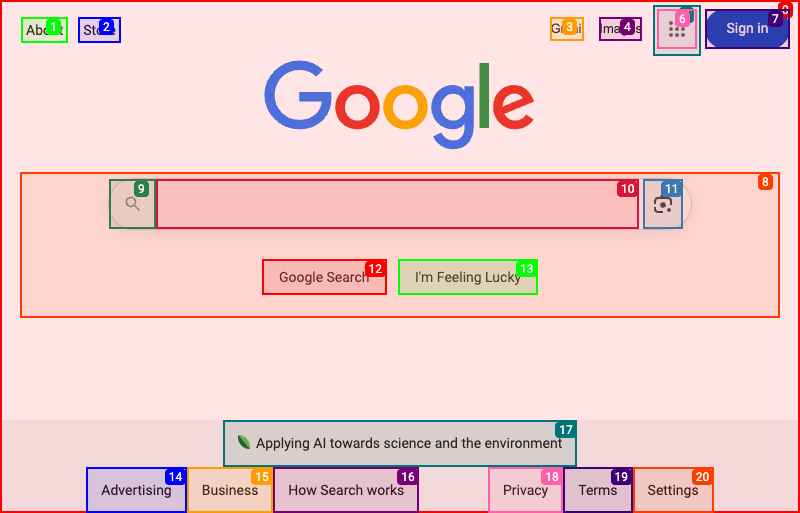
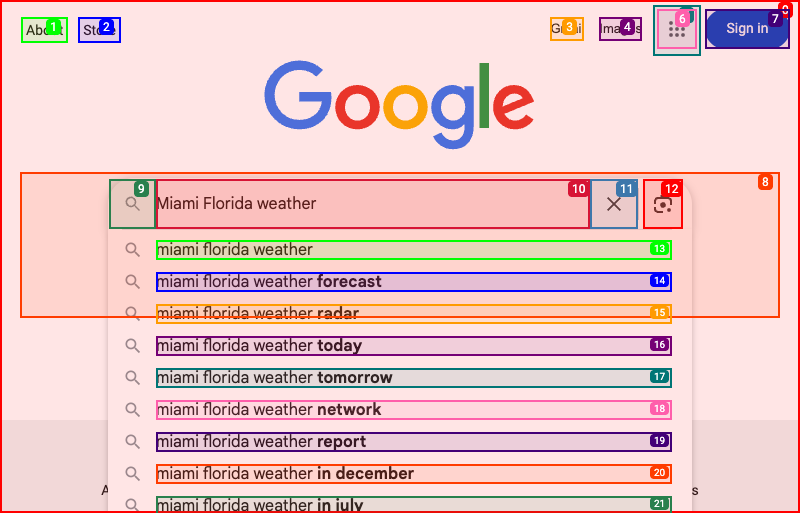
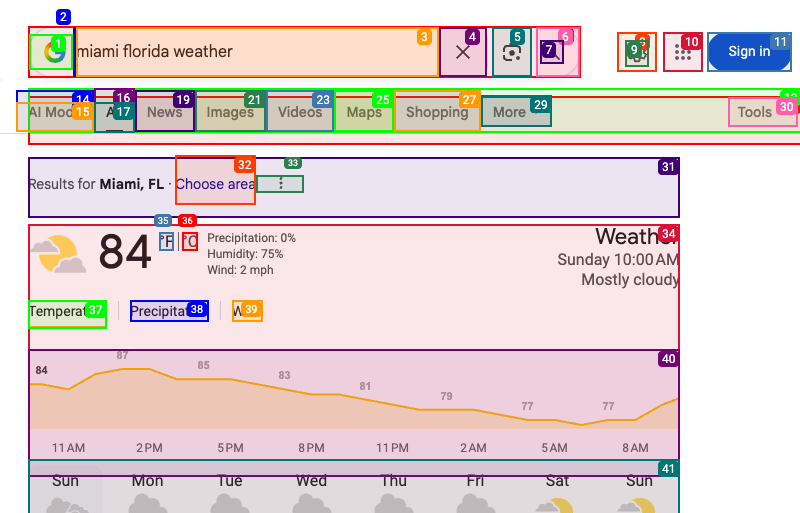

In [4]:

# Run the agent
async def main():

    try:
        result = await agent.run()
    except Exception as e:
        print(f"An error occurred: {e}")
        # Example of accessing history
        history = await agent.run()

        # # Access (some) useful information
        # history.urls()              # List of visited URLs
        # history.screenshots()       # List of screenshot paths
        # history.action_names()      # Names of executed actions
        # history.extracted_content() # Content extracted during execution
        # history.errors()           # Any errors that occurred
        # history.model_actions()     # All actions with their parameters

    # print(history)

# asyncio.run(main())
await main()

# ARCHIVED LOG

In [5]:
# Run the agent
async def main():

    try:
        result = await agent.run()
    except Exception as e:
        print(f"An error occurred: {e}")
        history = None
        # Example of accessing history
        history = await agent.run()

        # # Access (some) useful information
        # history.urls()              # List of visited URLs
        # history.screenshots()       # List of screenshot paths
        # history.action_names()      # Names of executed actions
        # history.extracted_content() # Content extracted during execution
        # history.errors()           # Any errors that occurred
        # history.model_actions()     # All actions with their parameters

    # print(history)

# asyncio.run(main())
await main()

INFO     [browser_use.Agent🅰 c268 on 🆂 25ee 🅟 40] 🚀 Starting task: Check the weather in Miami Florida
INFO     [browser_use.BrowserSession🆂 25ee:None #52] 🎭 Launching new local browser playwright:chromium keep_alive=False user_data_dir= ~/.config/browseruse/profiles/default
INFO     [browser_use.BrowserSession🆂 25ee:None #52]  ↳ Spawning Chrome subprocess listening on CDP http://127.0.0.1:51544/ with user_data_dir= ~/.config/browseruse/profiles/default
INFO     [browser_use.BrowserSession🆂 25ee:51544 #52] 🌎 Connecting to newly spawned browser via CDP http://127.0.0.1:51544/ -> browser_pid=18299 (local)
INFO     [browser_use.controller.service] 🔗  Opened new tab #1 with url https://www.google.com
INFO     [browser_use.Agent🅰 c268 on 🆂 25ee 🅟 36] ☑️ Executed action 1/1: go_to_url()
INFO     [browser_use.BrowserSession🆂 25ee:51544 #52] ➡️ Page navigation [1]google.com/ took 0.52s
INFO     [browser_use.Agent🅰 c268 on 🆂 25ee 🅟 36] 📍 Step 5: Evaluating page with 21 interactive elements on: h

# Defining an output agent should return to you 

https://docs.browser-use.com/customize/output-format

In [ ]:
# from pydantic import BaseModel
# # Define the output format as a Pydantic model
# class Post(BaseModel):
# 	post_title: str
# 	post_url: str
# 	num_comments: int
# 	hours_since_post: int


# class Posts(BaseModel):
# 	posts: List[Post]


# controller = Controller(output_model=Posts)
# agent = Agent(task=task, llm=model, controller=controller)